In [1]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.foreignexchange import ForeignExchange

import matplotlib.pyplot as plt

import os

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2018-05-25 09:30:00    98.30    98.36   98.30     98.36   320088.0
2018-05-25 09:31:00    98.36    98.58   98.28     98.54    89731.0


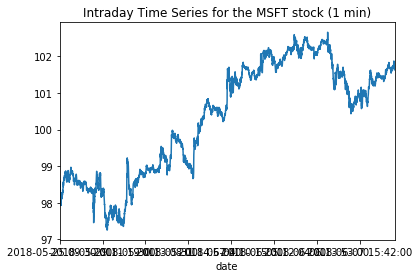

In [57]:
ts = TimeSeries(key=os.environ['VANTAGE_API_KEY'], output_format='pandas')

data, meta_data = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')
print(data.head(2))

data['4. close'].plot()
plt.title('Intraday Time Series for the MSFT stock (1 min)')
plt.show()

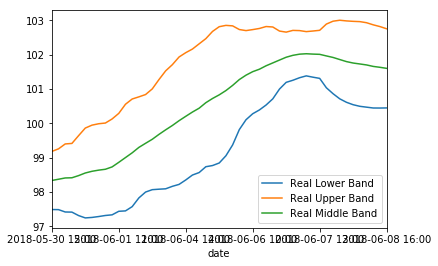

In [58]:
ti = TechIndicators(key=os.environ['VANTAGE_API_KEY'], output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min')
data.plot()
plt.show()

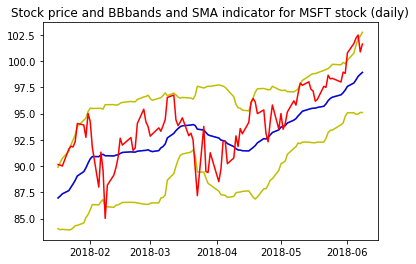

In [79]:
ts = TimeSeries(key=os.environ['VANTAGE_API_KEY'], output_format='pandas')
ti = TechIndicators(key=os.environ['VANTAGE_API_KEY'], output_format='pandas')

# Add Daily price stocks
data_stock, _ = ts.get_daily(symbol='MSFT', outputsize='full')
data_stock.index = data_stock.index.to_datetime()
data_stock = data_stock[-100:]

# Add Bollinger Bands Indicator
data_bb, _ = ti.get_bbands(symbol='MSFT', interval='daily')
data_bb.index = data_bb.index.to_datetime()
data_bb = data_bb[-100:]

# Add simple Moving Average Indicator
data_sma, _ = ti.get_sma(symbol='MSFT', interval='daily')
data_sma.index = data_sma.index.to_datetime()
data_sma = data_sma[-100:]

plt.plot(data_bb, c='y')
plt.plot(data_sma, c='b')

plt.plot(data_stock['4. close'], c='r')

plt.title('Stock price and BBbands and SMA indicator for MSFT stock (daily)')
plt.show()

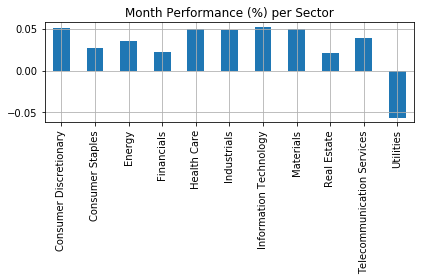

In [66]:
sp = SectorPerformances(key='4UUBMH9GBINQ785A', output_format='pandas')
data, meta_data = sp.get_sector()
#print(data)
data['Rank D: Month Performance'].plot(kind='bar')
plt.title('Month Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [53]:
cc = ForeignExchange(key=os.environ['VANTAGE_API_KEY'])

data, _ = cc.get_currency_exchange_rate(from_currency='USD', to_currency='RUB')
print(data)

{'1. From_Currency Code': 'USD', '2. From_Currency Name': 'United States Dollar', '3. To_Currency Code': 'RUB', '4. To_Currency Name': 'Russian Ruble', '5. Exchange Rate': '62.33040000', '6. Last Refreshed': '2018-06-10 19:26:04', '7. Time Zone': 'UTC'}
